In [3]:
# plot imports
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from skimage.measure import EllipseModel
from lc_tda.plot import rcparams, format_axis, format_axis_im

# sklearn imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, confusion_matrix

# other imports
import glob
import pickle
import numpy as np
from lc_tda.topology import minkowski, fractal_minkowski

# format figures
rcparams(1)

# define color cycle
COLOR = ['#515151', '#df5048', '#3370d8', '#5baa71',
         '#a87bd8', '#c49b33', '#5bc8ca', '#76504f',
         '#8e8c2b', '#ea6f2d', '#7099c8', '#80b537']

# descriptor orders:
# 0: VL, 1: AR, 2: BL, 3: EC, 4: FD, 5: LA

# color orders:
# 0: A*, 1: B*, 2: blue, 3: gray, 4: green, 5: L*, 6: red


### 1. Dataset PCA

Corresponding to Figure 9.


In [4]:
with open('../data/o3cl2/o3cl2_601.pickle', 'rb') as handle:
    m1 = pickle.load(handle)

with open('../data/o3cl2/o3cl2_597.pickle', 'rb') as handle:
    m2 = pickle.load(handle)

m = np.concatenate((m1, m2), axis=-0)

ec = m[..., -1]
ss = StandardScaler()
ec = ss.fit_transform(ec)
pca = PCA(n_components=2, random_state=0, whiten=True)
ec = pca.fit_transform(ec)


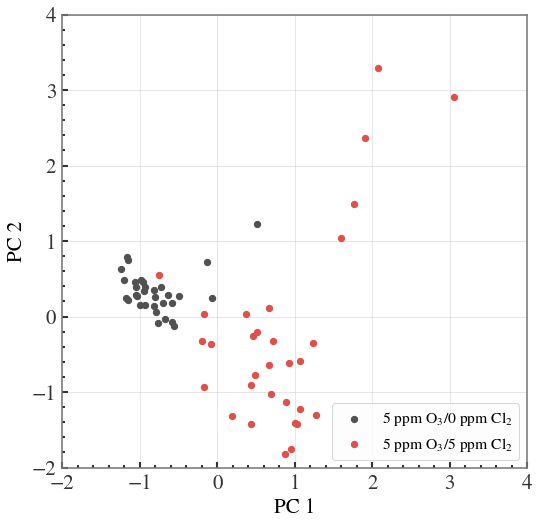

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(ec[:32, 0], ec[:32, 1], label='5 ppm O$_3$/0 ppm Cl$_2$')
ax.scatter(ec[32:, 0], ec[32:, 1], label='5 ppm O$_3$/5 ppm Cl$_2$')
ax.set_xlim([-2, 4])
ax.set_ylim([-2, 4])
ax.legend(loc=4)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
format_axis(ax)
ax.set_xticks([-2, -1, 0, 1, 2, 3, 4])
ax.set_yticks([-2, -1, 0, 1, 2, 3, 4])

plt.savefig('../image/case_study_o3_cl2/pca_o3cl2.png', dpi=300,
            bbox_inches='tight', transparent=True)


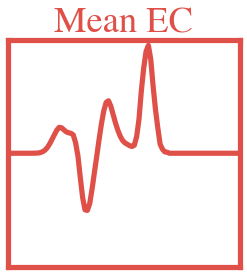

In [6]:
# mean EC
fig, ax = plt.subplots(figsize=(4, 4))
temp = m[32:, :, -1].mean(axis=0)
temp = np.convolve(temp, np.ones(5)/5, mode='same')
temp /= abs(temp).max()
ax.plot(temp, c='#df5048', lw=5)
ax.set_xlim([0, 99])
ax.set_ylim([-1.05, 1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Mean EC', c='#df5048', fontsize=35)
format_axis_im(ax)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(5.)
    ax.spines[axis].set_color('#df5048')


plt.savefig('../image/case_study_o3_cl2/o3cl2_pca_ec_55.png', dpi=300,
            bbox_inches='tight', transparent=True)


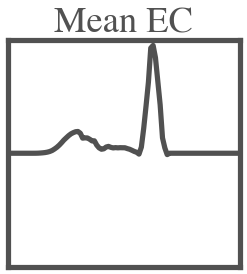

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
temp = m[:32, :, -1].mean(axis=0)
temp = np.convolve(temp, np.ones(5)/5, mode='same')
temp /= abs(temp).max()
ax.plot(temp, c='#515151', lw=5)
ax.set_xlim([0, 99])
ax.set_ylim([-1.05, 1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Mean EC', c='#515151', fontsize=35)
format_axis_im(ax)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(5.)
    ax.spines[axis].set_color('#515151')


plt.savefig('../image/case_study_o3_cl2/o3cl2_pca_ec_50.png', dpi=300,
            bbox_inches='tight', transparent=True)


In [8]:
with open('../data/o3cl2/tda_3d.pickle', 'rb') as handle:
    x_all = pickle.load(handle)
    y_all = pickle.load(handle)

xa = []
ya = []
c = 0
for k in [1.5, 5, 100, 650]:
    idx = np.where((y_all[:, 0] == k) & (y_all[:, 1] == 5))[0]
    xa.append(x_all[6, idx, :, 3:])
    ya.append(np.ones(len(idx))*c)
    c += 1
xa = np.concatenate(xa)
ya = np.concatenate(ya)

labels = ['1.5 ppm O$_3$', '5 ppm O$_3$', '100 ppm O$_3$', '650 ppm O$_3$']
methods = ['EC', 'FD', "LA"]


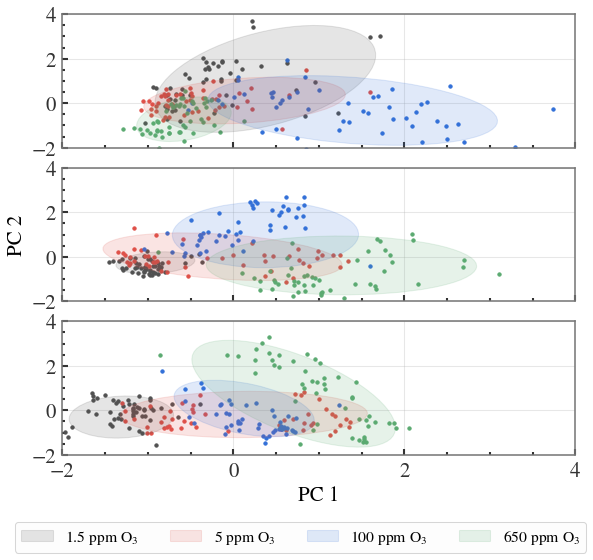

In [9]:
fig, axs = plt.subplots(figsize=(8, 7,), nrows=3, sharex=True, sharey=True)

for l in range(3):
    ax = axs[l]
    ss = StandardScaler()
    x = ss.fit_transform(xa[..., l])
    pca = PCA(n_components=2, random_state=2, whiten=True)
    x = pca.fit_transform(x)
    for i in range(4):
        a_points = x[i*50:(i+1)*50]
        x_ = a_points[:, 0]
        y_ = a_points[:, 1]
        ax.scatter(x_, y_, s=10)
        ell = EllipseModel()
        ell.estimate(a_points)
        xc, yc, a, b, theta = ell.params
        ell_patch = Ellipse((xc, yc), 2.5*a, 2.5*b, theta*180/np.pi,
                            edgecolor=COLOR[i], facecolor=COLOR[i], alpha=0.15)
        ax.add_patch(ell_patch)
    ax.set_ylim([-2, 4])
    ax.set_xlim([-2, 4])
    if l == 1:
        ax.set_ylabel('PC 2')

    format_axis(ax)

ax.set_xlabel('PC 1')


fig.legend(labels, loc='lower right', bbox_to_anchor=(1, -0.08),
           ncol=len(labels), bbox_transform=fig.transFigure,)

plt.tight_layout()
fig.subplots_adjust(hspace=0.15)

plt.savefig('../image/case_study_o3_cl2/o3cl2_pca_ec_fd_la.png', dpi=300,
            bbox_inches='tight', transparent=True)


### 2. TDA Predictions

Corresponding to Figure 10.


In [21]:
def result(name='o3', color='*', desp='combined', pca='100'):
    """TDA O3/Cl2 results.

    Args:
        name (str, optional): 'o3' or 'cl2'. Defaults to 'o3'.
        color (str, optional): color channels. Defaults to '*'.
        desp (str, optional): topological descriptors. Defaults to 'combined'.
        pca (str, optional): pca ratio. Defaults to '100'.

    Returns:
        tuple: accuracy, rmse
    """
    file = sorted(
        glob.glob(f'../result/tda/o3cl2_{color}_{desp}_{pca}.pickle'))

    yc, yr = [], []
    for file_ in file:
        if name == 'o3':
            with open(file_, 'rb') as handle:
                yc_ = pickle.load(handle)
                yr_ = pickle.load(handle)
        elif name == 'cl2':
            with open(file_, 'rb') as handle:
                _ = pickle.load(handle)
                _ = pickle.load(handle)
                _ = pickle.load(handle)
                yc_ = pickle.load(handle)
                yr_ = pickle.load(handle)
        yc.append(yc_)
        yr.append(yr_)

    yc = np.array(yc)
    yr = np.array(yr)

    if color == '*':
        acc = np.array([accuracy_score(yc[i, 0], yc[i, 1])
                       for i in range(len(file))])[[6, 7, 5, 3, 2, 0, 1, 4]]
        rmse = np.array([mean_squared_error(yr[i, 0], yr[i, 1]) **
                        0.5 for i in range(len(file))])[[6, 7, 5, 3, 2, 0, 1, 4]]
    else:
        acc = np.array([accuracy_score(yc[i, 0], yc[i, 1])
                       for i in range(len(file))])
        rmse = np.array([mean_squared_error(yr[i, 0], yr[i, 1])
                        ** 0.5 for i in range(len(file))])
    return acc, rmse


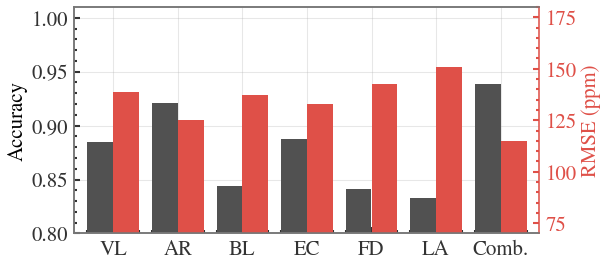

In [22]:
# O3 Descriptor
xx = np.arange(7)
acc_o3, rmse_o3 = result(name='o3', color='gray', desp='*', pca=100)
fig, ax = plt.subplots(figsize=(8, 4))
ax1 = ax.twinx()
ax.bar(xx-0.2, acc_o3, color=COLOR[0], width=0.4)
ax1.bar(xx+0.2, rmse_o3, color=COLOR[1], width=0.4)

ax.set_ylabel('Accuracy')
ax.set_xlim([-0.6, 6.6])
ax1.set_ylabel('RMSE (ppm)')

ax.set_ylim([0.8, 1.01])
ax1.set_ylim([70.0, 180.0])

ax.grid(True)
ax1.grid()
idx = np.argmax(acc_o3)
idx2 = np.argmin(rmse_o3)
format_axis(ax)
format_axis(ax1)

ax.spines['right'].set_visible(False)

ax1.spines['right'].set_color(COLOR[1])
ax1.tick_params(axis='y', which='both', colors=COLOR[1])
ax1.yaxis.label.set_color(COLOR[1])
ax.set_xticks(xx)
ax.set_xticklabels(['VL', 'AR', 'BL', 'EC', 'FD', 'LA', 'Comb.'])


plt.savefig('../image/case_study_o3_cl2/o3_desp.png', dpi=300,
            bbox_inches='tight', transparent=True)


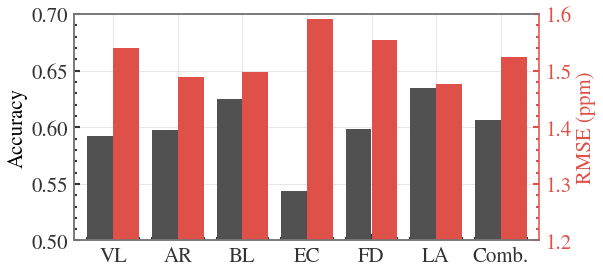

In [23]:
# Cl2 Descriptor
xx = np.arange(7)
acc_cl2, rmse_cl2 = result(name='cl2', color='gray', desp='*', pca=100)
fig, ax = plt.subplots(figsize=(8, 4))
ax1 = ax.twinx()
ax.bar(xx-0.2, acc_cl2, color=COLOR[0], width=0.4)
ax1.bar(xx+0.2, rmse_cl2, color=COLOR[1], width=0.4)

ax.set_ylabel('Accuracy')
ax.set_xlim([-0.6, 6.6])
ax1.set_ylabel('RMSE (ppm)')

ax.set_ylim([0.5, 0.7])
ax1.set_ylim([1.2, 1.6])

ax.grid(True)
ax1.grid()
idx = np.argmax(acc_cl2)
idx2 = np.argmin(rmse_cl2)
format_axis(ax)
format_axis(ax1)

ax.spines['right'].set_visible(False)

ax1.spines['right'].set_color(COLOR[1])
ax1.tick_params(axis='y', which='both', colors=COLOR[1])
ax1.yaxis.label.set_color(COLOR[1])
ax.set_xticks(xx)
ax.set_xticklabels(['VL', 'AR', 'BL', 'EC', 'FD', 'LA', 'Comb.'])


plt.savefig('../image/case_study_o3_cl2/cl2_desp.png', dpi=300,
            bbox_inches='tight', transparent=True)


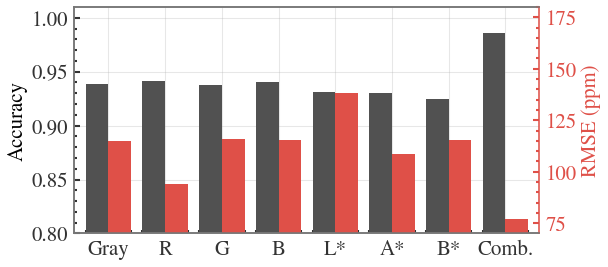

In [24]:
# O3 Color
acc_o3, rmse_o3 = result(name='o3', pca=100)
xx = np.arange(8)

fig, ax = plt.subplots(figsize=(8, 4))
ax1 = ax.twinx()
ax.bar(xx-0.2, acc_o3, color=COLOR[0], width=0.4)
ax1.bar(xx+0.2, rmse_o3, color=COLOR[1], width=0.4)

ax.set_ylabel('Accuracy')
ax.set_xlim([-0.6, 7.6])
ax1.set_ylabel('RMSE (ppm)')

ax.set_ylim([0.8, 1.01])
ax1.set_ylim([70.0, 180.0])
idx = np.argmax(acc_o3)
idx2 = np.argmin(rmse_o3)

ax.grid(True)
ax1.grid()
format_axis(ax)
format_axis(ax1)

ax.spines['right'].set_visible(False)

ax1.spines['right'].set_color(COLOR[1])
ax1.tick_params(axis='y', which='both', colors=COLOR[1])
ax1.yaxis.label.set_color(COLOR[1])
ax.set_xticks(xx)
ax.set_xticklabels(['Gray', 'R', 'G', 'B', 'L*', 'A*', 'B*', 'Comb.'])

plt.savefig('../image/case_study_o3_cl2/o3_color.png', dpi=300,
            bbox_inches='tight', transparent=True)


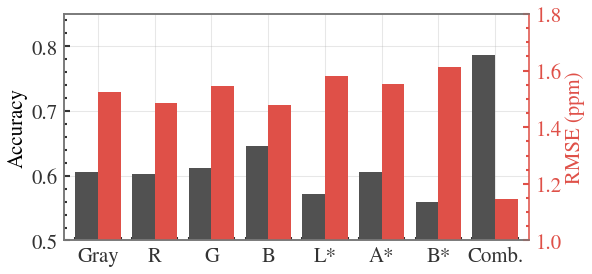

In [25]:
# Cl2 Color
acc_cl2, rmse_cl2 = result(name='cl2', pca=100)
xx = np.arange(8)

fig, ax = plt.subplots(figsize=(8, 4))
ax1 = ax.twinx()
ax.bar(xx-0.2, acc_cl2, color=COLOR[0], width=0.4)
ax1.bar(xx+0.2, rmse_cl2, color=COLOR[1], width=0.4)

ax.set_ylabel('Accuracy')
ax.set_xlim([-0.6, 7.6])
ax1.set_ylabel('RMSE (ppm)')

ax.set_ylim([0.5, 0.85])
ax1.set_ylim([1.0, 1.8])

idx = np.argmax(acc_cl2)
idx2 = np.argmin(rmse_cl2)

ax.grid(True)
ax1.grid()
format_axis(ax)
format_axis(ax1)

ax.spines['right'].set_visible(False)

ax1.spines['right'].set_color(COLOR[1])
ax1.tick_params(axis='y', which='both', colors=COLOR[1])
ax1.yaxis.label.set_color(COLOR[1])
ax.set_xticks(xx)
ax.set_xticklabels(['Gray', 'R', 'G', 'B', 'L*', 'A*', 'B*', 'Comb.'])

plt.savefig('../image/case_study_o3_cl2/cl2_color.png', dpi=300,
            bbox_inches='tight', transparent=True)


In [26]:
def tda_prediction(name='o3', pca=100):
    """TDA regression and classification predictions.

    Args:
        name (str, optional): 'o3' or 'cl2'. Defaults to 'o3'.
        pca (int, optional): PCA ratio. Defaults to 100.

    Returns:
        tuple: classification, regression predictions and time.
    """
    file = sorted(
        glob.glob(f'../result/tda/o3cl2_combined_combined_{pca}.pickle'))

    yc, yr, time = [], [], []
    for file_ in file:
        if name == 'o3':
            with open(file_, 'rb') as handle:
                yc_ = pickle.load(handle)
                yr_ = pickle.load(handle)
                time_ = pickle.load(handle)
        elif name == 'cl2':
            with open(file_, 'rb') as handle:
                _ = pickle.load(handle)
                _ = pickle.load(handle)
                _ = pickle.load(handle)
                yc_ = pickle.load(handle)
                yr_ = pickle.load(handle)
                time_ = pickle.load(handle)
        yc.append(yc_)
        yr.append(yr_)
        time.append(time_)

    yc = np.array(yc).squeeze()
    yr = np.array(yr).squeeze()
    time = np.array(time).squeeze()

    return yc, yr, time


def cnn_prediction(name='o3', task='cls'):
    """CNN regression and classification predictions.

    Args:
        name (str, optional): 'o3' or 'cl2'. Defaults to 'o3'.
        task (str, optional): 'cls' or 'reg'. Defaults to 'cls'.

    Returns:
        tuple: prediction, time
    """
    files = glob.glob(
        f'../result/cnn/o3cl2/test_*_{task}_{name}.pickle')
    y_test = []
    y_pred = []
    time = []
    for file in files:
        with open(file, 'rb') as handle:
            y_ = pickle.load(handle)
            y_pred_ = pickle.load(handle).squeeze()
            _ = pickle.load(handle)
            time_ = pickle.load(handle)
            if task == 'cls':
                y_ = np.argmax(y_, axis=1)
                y_pred_ = np.argmax(y_pred_, axis=1)
        y_test.append(y_)
        y_pred.append(y_pred_)
        time.append(time_)
    y_test = np.concatenate(y_test)
    y_pred = np.concatenate(y_pred)

    y = np.concatenate((y_test[None, ...], y_pred[None, ...]), axis=0)
    time = np.array(time)
    return y, time


In [27]:
yc_o3, yr_o3, time_o3 = tda_prediction(name='o3')
yc_cl2, yr_cl2, time_cl2 = tda_prediction(name='cl2')
yc_cnn_o3, timec_cnn_o3 = cnn_prediction(name='o3', task='cls')
yc_cnn_cl2, timec_cnn_cl2 = cnn_prediction(name='cl2', task='cls')
yr_cnn_o3, timer_cnn_o3 = cnn_prediction(name='o3', task='reg')
yr_cnn_cl2, timer_cnn_cl2 = cnn_prediction(name='cl2', task='reg')


In [29]:
print(f'O3 TDA Acc:  {accuracy_score(yc_o3[0], yc_o3[1]):0.4f}')
print(f'O3 CNN Acc:  {accuracy_score(yc_cnn_o3[0], yc_cnn_o3[1]):0.4f}')
print(f'Cl2 TDA Acc: {accuracy_score(yc_cl2[0], yc_cl2[1]):0.4f}')
print(f'Cl2 CNN Acc: {accuracy_score(yc_cnn_cl2[0], yc_cnn_cl2[1]):0.4f}')

print(f'O3 TDA RMSE:  {mean_squared_error(yr_o3[0], yr_o3[1])**0.5:0.4f}')
print(
    f'O3 CNN RMSE:  {mean_squared_error(yr_cnn_o3[0], yr_cnn_o3[1])**0.5:0.4f}')
print(f'Cl2 TDA RMSE: {mean_squared_error(yr_cl2[0], yr_cl2[1])**0.5:0.4f}')
print(
    f'Cl2 CNN RMSE: {mean_squared_error(yr_cnn_cl2[0], yr_cnn_cl2[1])**0.5:0.4f}')
print(f'O3 TDA R2:  {r2_score(yc_o3[0], yc_o3[1]):0.4f}')
print(f'O3 CNN R2:  {r2_score(yc_cnn_o3[0], yc_cnn_o3[1]):0.4f}')
print(f'Cl2 TDA R2: {r2_score(yc_cl2[0], yc_cl2[1]):0.4f}')
print(f'Cl2 CNN R2: {r2_score(yc_cnn_cl2[0], yc_cnn_cl2[1]):0.4f}')
# the time is for 1 fold, to consider 5 fold, times 5.
print(f'O3 TDA Time:  {time_o3.mean():0.4f} + {time_o3.std():0.4f}')
print(
    f'O3 CNN Time:  {np.concatenate([timer_cnn_o3, timec_cnn_o3]).mean():0.4f} + {np.concatenate([timer_cnn_o3, timec_cnn_o3]).std():0.4f}')
print(f'Cl2 TDA Time: {time_cl2.mean():0.4f} + {time_cl2.std():0.4f}')
print(
    f'Cl2 CNN Time: {np.concatenate([timer_cnn_cl2, timec_cnn_cl2]).mean():0.4f} + {np.concatenate([timer_cnn_cl2, timec_cnn_cl2]).std():0.4f}')


O3 TDA Acc:  0.9862
O3 CNN Acc:  0.9912
Cl2 TDA Acc: 0.7863
Cl2 CNN Acc: 0.7113
O3 TDA RMSE:  76.8550
O3 CNN RMSE:  43.2374
Cl2 TDA RMSE: 1.1471
Cl2 CNN RMSE: 1.0122
O3 TDA R2:  0.9710
O3 CNN R2:  0.9730
Cl2 TDA R2: 0.5410
Cl2 CNN R2: 0.3380
O3 TDA Time:  0.6630 + 0.0259
O3 CNN Time:  1320.5318 + 523.5912
Cl2 TDA Time: 0.6523 + 0.0532
Cl2 CNN Time: 2280.7875 + 1085.9248


### 3. Computational Time

Corresponding to Figure 10.


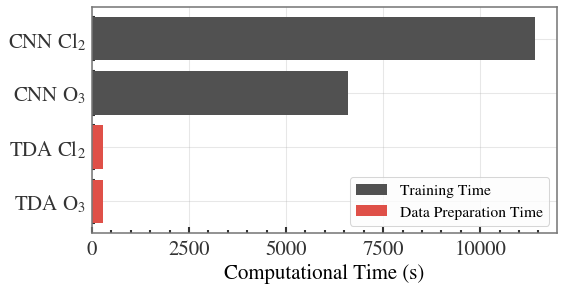

In [30]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(range(2, 4), [1320.5318 * 5, 2280.7875 * 5],  # five fold * 5
        capsize=5, label='Training Time')
ax.barh(range(2), [0.6630 * 5, 0.6523 * 5], capsize=5)
# training + data preparation
ax.barh(range(2), [0.6630 * 5 + 271.5136, 0.6523 * 5 + 271.5136], left=[0.6630 *
        5, 0.6523 * 5], capsize=5, color=COLOR[1], label='Data Preparation Time')
ax.set_xlabel('Computational Time (s)')
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(['TDA O$_3$', 'TDA Cl$_2$', 'CNN O$_3$', 'CNN Cl$_2$'])

ax.legend()
format_axis(ax)

plt.savefig('../image/case_study_o3_cl2/time.png', dpi=300,
            bbox_inches='tight', transparent=True)


### 4. Confusion Matrices

Corresponding to Figure 10.


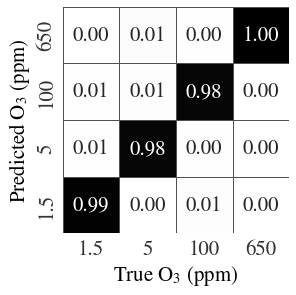

In [31]:
fig, ax = plt.subplots(figsize=(4, 4))
conf = confusion_matrix(yc_o3[0], yc_o3[1], normalize='pred')

conf = np.flipud(conf)
name = ['1.5', '5', '100', '650']

sn.heatmap(conf, annot=True, cmap="gray_r",
           square=True, vmax=1, vmin=0, fmt='0.2f',
           linewidths=.5, linecolor=COLOR[0], cbar=False, annot_kws={'fontsize': 20})

ax.set_xlabel('True O$_3$ (ppm)')
ax.set_ylabel('Predicted O$_3$ (ppm)')
format_axis_im(ax)
plt.xticks(np.arange(0.5, 4, 1), name, horizontalalignment='center')
plt.yticks(np.arange(3.5, -0.5, -1), name, verticalalignment='center')

plt.savefig('../image/case_study_o3_cl2/conf_tda_o3.png', dpi=300,
            bbox_inches='tight', transparent=True)


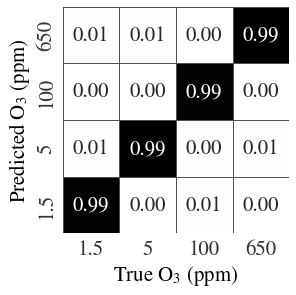

In [32]:
fig, ax = plt.subplots(figsize=(4, 4))
conf = confusion_matrix(yc_cnn_o3[0], yc_cnn_o3[1], normalize='pred')

conf = np.flipud(conf)
name = ['1.5', '5', '100', '650']

sn.heatmap(conf, annot=True, cmap="gray_r",
           square=True, vmax=1, vmin=0, fmt='0.2f',
           linewidths=.5, linecolor=COLOR[0], cbar=False, annot_kws={'fontsize': 20})

ax.set_xlabel('True O$_3$ (ppm)')
ax.set_ylabel('Predicted O$_3$ (ppm)')
format_axis_im(ax)
plt.xticks(np.arange(0.5, 4, 1), name, horizontalalignment='center')
plt.yticks(np.arange(3.5, -0.5, -1), name, verticalalignment='center')

plt.savefig('../image/case_study_o3_cl2/conf_cnn_o3.png', dpi=300,
            bbox_inches='tight', transparent=True)


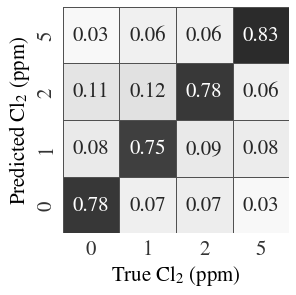

In [34]:
fig, ax = plt.subplots(figsize=(4, 4))
conf = confusion_matrix(yc_cl2[0], yc_cl2[1], normalize='pred')

conf = np.flipud(conf)
name = ['0', '1', '2', '5']

sn.heatmap(conf, annot=True, cmap="gray_r",
           square=True, vmax=1, vmin=0, fmt='0.2f',
           linewidths=.5, linecolor=COLOR[0], cbar=False, annot_kws={'fontsize': 20})

ax.set_xlabel('True Cl$_2$ (ppm)')
ax.set_ylabel('Predicted Cl$_2$ (ppm)')
format_axis_im(ax)
plt.xticks(np.arange(0.5, 4, 1), name, horizontalalignment='center')
plt.yticks(np.arange(3.5, -0.5, -1), name, verticalalignment='center')

plt.savefig('../image/case_study_o3_cl2/conf_tda_cl2.png', dpi=300,
            bbox_inches='tight', transparent=True)


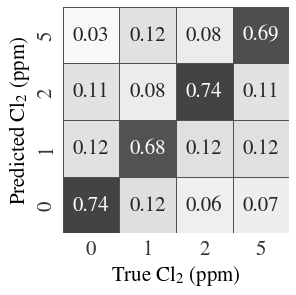

In [35]:
fig, ax = plt.subplots(figsize=(4, 4))
conf = confusion_matrix(yc_cnn_cl2[0], yc_cnn_cl2[1], normalize='pred')

conf = np.flipud(conf)
name = ['0', '1', '2', '5']

sn.heatmap(conf, annot=True, cmap="gray_r",
           square=True, vmax=1, vmin=0, fmt='0.2f',
           linewidths=.5, linecolor=COLOR[0], cbar=False, annot_kws={'fontsize': 20})

ax.set_xlabel('True Cl$_2$ (ppm)')
ax.set_ylabel('Predicted Cl$_2$ (ppm)')
format_axis_im(ax)
plt.xticks(np.arange(0.5, 4, 1), name, horizontalalignment='center')
plt.yticks(np.arange(3.5, -0.5, -1), name, verticalalignment='center')

plt.savefig('../image/case_study_o3_cl2/conf_cnn_cl2.png', dpi=300,
            bbox_inches='tight', transparent=True)


### 5. Parity Plots

Corresponding to Figure 10.


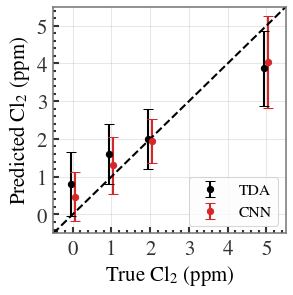

In [36]:
fig, ax = plt.subplots(figsize=(4, 4))
y_u = np.unique(yr_cl2[0])
for i, y_ in enumerate(y_u):
    ind = np.where(yr_cl2[0] == y_)[0]
    mean = yr_cl2[1][ind].mean()
    std = yr_cl2[1][ind].std()
    if i == 0:
        ax.errorbar(y_-0.05, mean, std, color='k',
                    capsize=5, fmt='o', label='TDA')
    else:
        ax.errorbar(y_-0.05, mean, std, color='k', capsize=5, fmt='o')

y_u = np.unique(yr_cnn_cl2[0])
for i, y_ in enumerate(y_u):
    ind = np.where(yr_cnn_cl2[0] == y_)[0]
    mean = yr_cnn_cl2[1][ind].mean()
    std = yr_cnn_cl2[1][ind].std()
    if i == 0:
        ax.errorbar(y_+0.05, mean, std, color='tab:red',
                    capsize=5, fmt='o', label='CNN')
    else:
        ax.errorbar(y_+0.05, mean, std, color='tab:red', capsize=5, fmt='o')

lim = [-0.5, 5.5]
ax.plot(lim, lim, 'k--')
ax.set_xlim(lim)
ax.set_ylim(lim)

ax.set_xlabel('True Cl$_2$ (ppm)')
ax.set_ylabel('Predicted Cl$_2$ (ppm)')
# ax.grid()
ax.legend(loc=4)
format_axis(ax)
ax.set_xticks(np.arange(6))
ax.set_xticklabels(np.arange(6))
ax.set_yticks(np.arange(6))
ax.set_yticklabels(np.arange(6))

plt.savefig('../image/case_study_o3_cl2/parity_o3.png', dpi=300,
            bbox_inches='tight', transparent=True)


### 6. PCA Time Evolution

Corresponding to Figure 11.


In [37]:
with open('../data/o3cl2/video_55.pickle', 'rb') as handle:
    x = pickle.load(handle)
    y = pickle.load(handle)

x = x[119]
y = y[119]

print(f'{y[0]} ppm O3, {y[1]} ppm Cl2')

x = x.mean(axis=-1)[:, 3:-3, 3:-3]  # remove some empty boundaries


5.0 ppm O3, 5.0 ppm Cl2


In [42]:
mk = []
fm = []
for i in range(len(x)):
    x_ = np.copy(x[i])
    x_ -= x_.mean()
    x_ /= x_.std()
    mk.append(minkowski(x_, thresholds=np.linspace(-4, 4, 100)))
    fm.append(fractal_minkowski(x_, thresholds=np.linspace(-4, 4, 100)))
mk = np.array(mk)
fm = np.array(fm)

mk = np.concatenate((mk, fm), axis=-1)


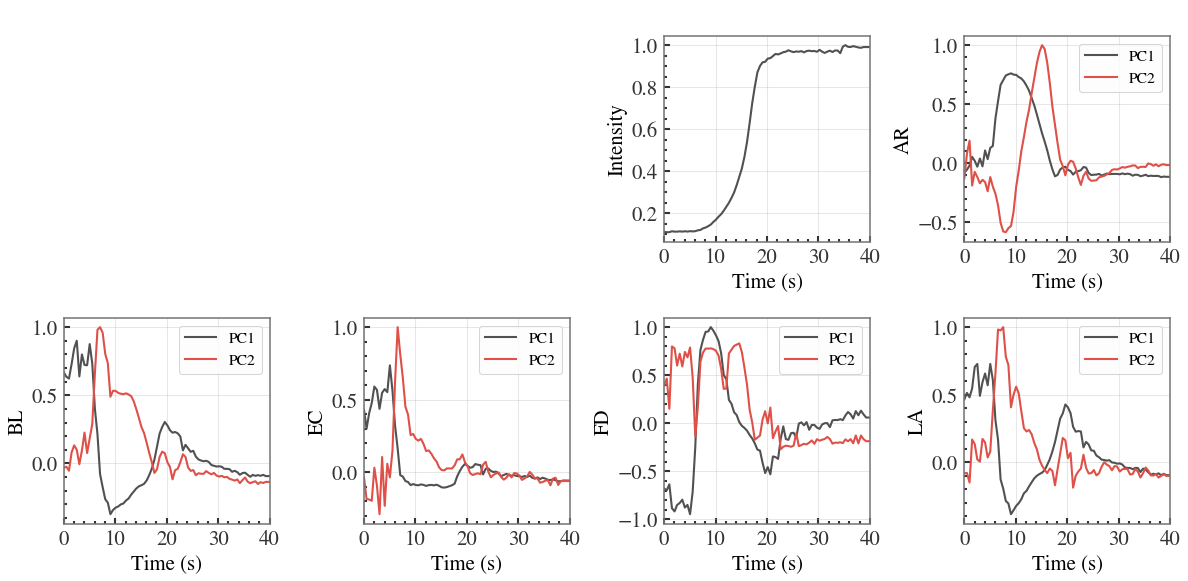

In [44]:
fig, ax = plt.subplots(figsize=(16, 8), nrows=2, ncols=4, tight_layout=True)
NAMES = ['AR', 'BL', 'EC', 'FD', 'LA']
a = x.mean(axis=(1, 2))
ax = ax.ravel()
xx = np.linspace(0, 75, 150)
ax[0].axis('off')
ax[1].axis('off')
i = 2
a /= np.abs(a).max()
ax[i].plot(xx, a)

ax[i].set_xlim([0, 40])
ax[i].set_xlabel('Time (s)')
ax[i].set_ylabel('Intensity')
ax[i].set_aspect(1.0/ax[i].get_data_ratio(), adjustable='box')
format_axis(ax[i])

for i in range(3, 8):
    pca = PCA(n_components=2, whiten=True, random_state=0)
    b = mk[..., i-3]

    b = [np.convolve(b[i], np.ones(5)/5, mode='same') for i in range(len(b))]
    b = np.array(b)
    b = pca.fit_transform(b)

    b /= np.abs(b).max()
    ax[i].plot(xx, b)

    ax[i].set_xlim([0, 40])
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel(NAMES[i-3])
    ax[i].set_aspect(1.0/ax[i].get_data_ratio(), adjustable='box')
    ax[i].legend(['PC1', 'PC2'])
    format_axis(ax[i])

plt.savefig('../image/case_study_o3_cl2/o3cl2_time_monitoring.png', dpi=300,
            bbox_inches='tight', transparent=True)

5.0 ppm O3, 5.0 ppm Cl2


/Users/sjiang87/lc_tda/lc_tda/topology.py:61: RuntimeWarning: divide by zero encountered in log
  coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)


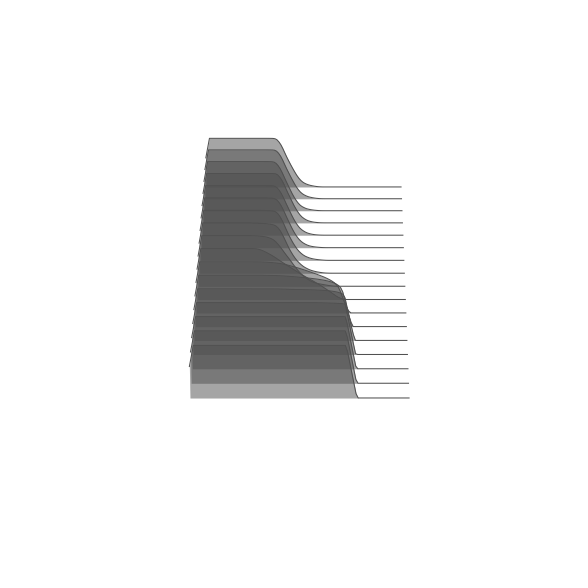

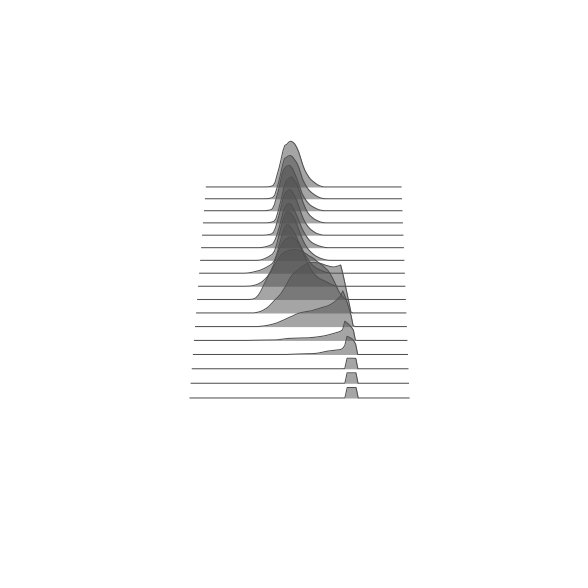

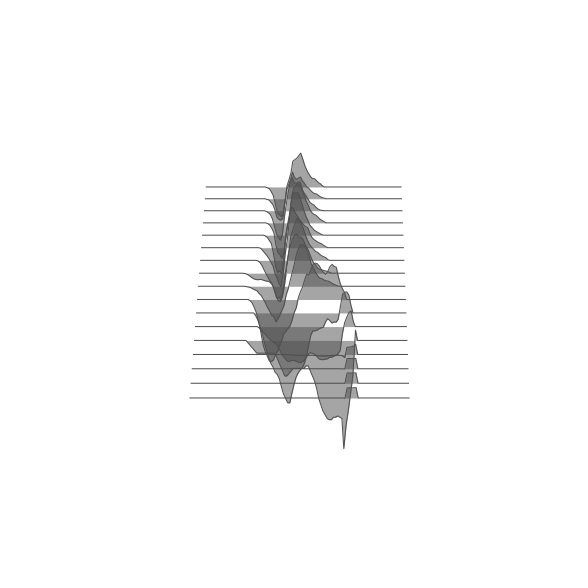

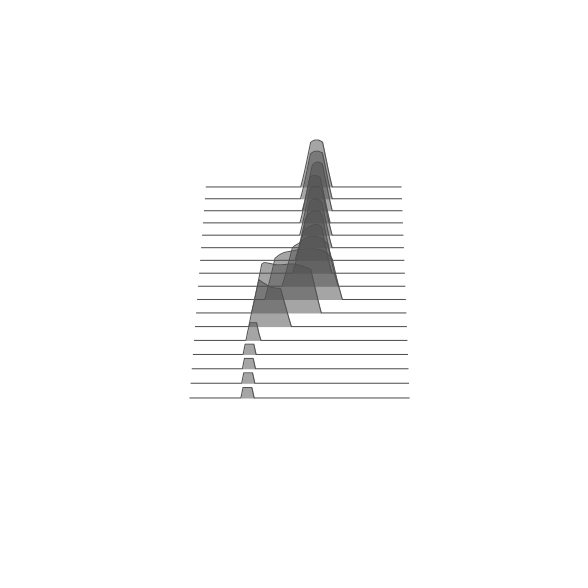

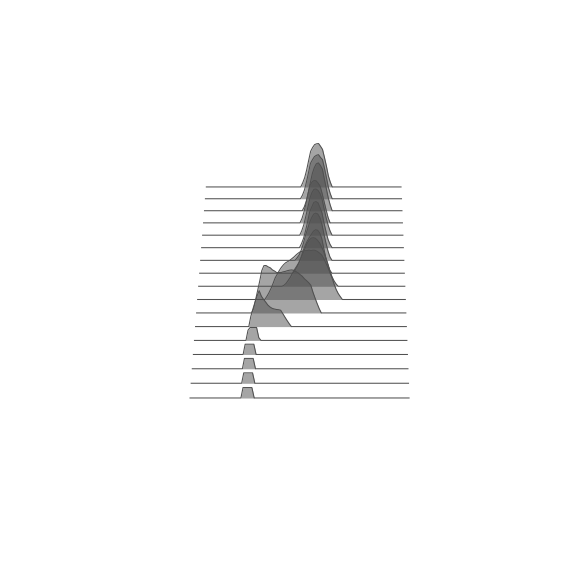

In [47]:
with open('../data/o3cl2/video_55.pickle', 'rb') as handle:
    x = pickle.load(handle)
    y = pickle.load(handle)

idx = 119
x = x[idx]
y = y[idx]

print(f'{y[0]} ppm O3, {y[1]} ppm Cl2')

x = x.mean(axis=-1)
x -= x.mean()
x /= x.std()

mk = []
fm = []
for i in range(len(x)):
    x_ = np.copy(x[i])[3:-3,3:-3]
    mk.append(minkowski(x_, thresholds=np.linspace(-4, 4, 100)))
    fm.append(fractal_minkowski(x_, thresholds=np.linspace(-4, 4, 100)))
mk = np.array(mk)
fm = np.array(fm)

mk = np.concatenate((mk, fm), axis=-1)

x = np.linspace(-4, 4, 100)

for k in range(5):
    plt.figure(tight_layout=True)
    ax = plt.subplot(projection='3d')
    j = 0
    for i in np.arange(0, 81, 5):
        y = np.ones(x.size)*i
        z = mk[i, ..., k] / mk[i, ..., k].max()
        z = np.convolve(z, np.ones(5) / 5, mode='same')

        ax.plot(x+j, y, z, color='#515151', lw=1)

        ax.add_collection3d(plt.fill_between(
            x+j, 0, z, color='#515151', alpha=0.3, lw=0), zs=i, zdir='y')
        j += 0.01

    ax.set_zlim([-2, 2])

    ax.set_box_aspect((1, 2, 1))
    ax.view_init(30, -90)
    ax.axis('off')

    plt.savefig(f'../image/case_study_o3_cl2/time_monitoring_{k}.png', dpi=300,
                bbox_inches='tight', transparent=True)
